In [69]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np

In [70]:
(x_train, y_train) , (x_test, y_test) = datasets.mnist.load_data()

In [41]:
x_train[0].shape

(28, 28)

In [42]:
len(x_train)

60000

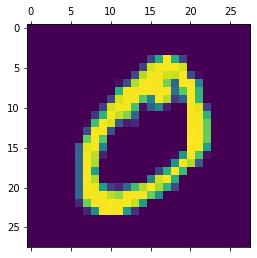

In [43]:
plt.matshow(X_train[1])

In [44]:
y_train[0]

5

In [82]:
classes = ["zero","one","two","three","four","five","six","seven","eight","nine"]

In [83]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

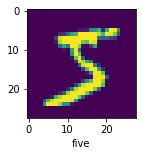

In [84]:
plot_sample(X_train, y_train, 0)

In [71]:
x_train = x_train / 255
x_test = x_test / 255

In [72]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)

In [73]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
                        
])

In [74]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1329 - accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0160 - accuracy: 0.9950


In [75]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0309 - accuracy: 0.9901


[0.030866967514157295, 0.9901000261306763]

In [76]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.05333031e-08, 1.37906483e-07, 2.06523146e-06, 5.05538480e-07,
        4.85821205e-09, 9.69840874e-10, 6.87482016e-12, 9.99996066e-01,
        3.37350116e-07, 9.04375213e-07],
       [1.41579304e-09, 4.56454741e-09, 1.00000000e+00, 1.32861289e-12,
        7.65345578e-13, 6.42038110e-16, 8.51701265e-10, 1.57037383e-10,
        2.63877586e-09, 2.81755684e-14],
       [2.17352681e-06, 9.99857187e-01, 4.81786356e-06, 2.61715805e-09,
        2.05006654e-05, 8.81087487e-07, 2.06564982e-06, 2.62337308e-05,
        8.55022517e-05, 6.75788442e-07],
       [9.99996424e-01, 1.19973502e-11, 9.17177871e-08, 1.77646245e-10,
        1.64465233e-10, 3.46961881e-09, 3.43143279e-06, 1.81445997e-10,
        2.13690576e-09, 1.07580842e-08],
       [8.35719671e-09, 4.09617318e-09, 1.10009903e-08, 5.98739461e-11,
        9.99981523e-01, 1.25712667e-08, 1.06417254e-07, 2.20025367e-08,
        2.73437820e-07, 1.80979059e-05]], dtype=float32)

In [78]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [79]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

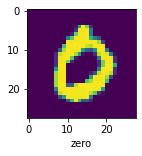

In [87]:
plot_sample(X_test, y_test,3)

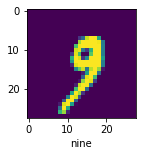

In [88]:
plot_sample(X_test, y_test,1000)

In [89]:
classes[y_classes[3]]

'zero'

In [90]:
classes[y_classes[3]]

'zero'